# Polynomial Regression Regression
-----

## Step 1: <span style="text-decoration:underline">Importing the libraries</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: <span style="text-decoration:underline">Importing the dataset</span>

In [2]:
dataset = pd.read_csv("Ice_cream selling data.csv")

In [3]:
dataset.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


## Step 3:  <span style="text-decoration:underline">Data analysis</span>

In [4]:
# To analyze descriptive statistics of data
dataset.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


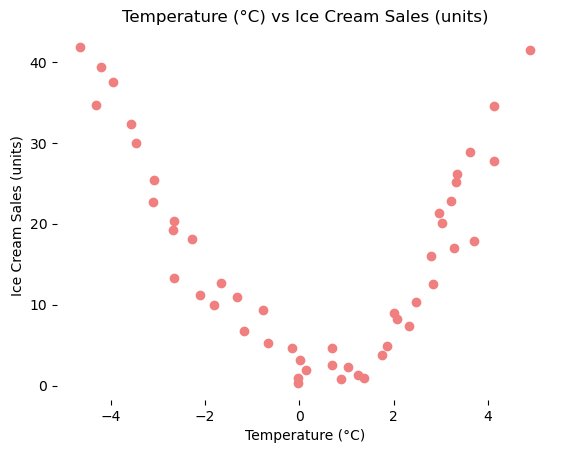

In [6]:
# Relationship between Salary and Experience
plt.scatter(dataset['Temperature (°C)'], dataset['Ice Cream Sales (units)'], color = 'lightcoral')
plt.title('Temperature (°C) vs Ice Cream Sales (units)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.box(False)
plt.show()

## Step 4: <span style="text-decoration:underline">Split the dataset into dependent/independent variables</span>

In [7]:
# independent variables
x = dataset.iloc[:,:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

## Step 5:  <span style="text-decoration:underline">Spliting the dataset into thetraining set and test set</span>

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                   random_state=0)

## Step 6: <span style="text-decoration:underline">Training the Polynomail Regression model on training set</span>

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_train = poly_reg.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

## Step 7: <span style="text-decoration:underline">Predicting The Test set results</span>

In [10]:
y_pred = lin_reg.predict(poly_reg.fit_transform(x_test))

In [11]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0.953115,4.675031
1,32.284531,30.482121
2,0.789974,2.909247
3,3.782570,6.791728
4,8.943823,8.585803
5,12.568237,16.062123
6,7.412094,11.160549
7,22.839406,20.205076
8,25.365022,24.969824
9,13.275828,20.312793


## Step 8:  <span style="text-decoration:underline">Visualsing the results</span>


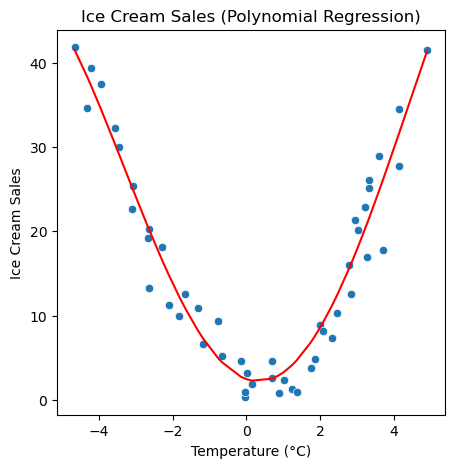

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dataset["Temperature (°C)"],y=y,data=dataset)
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)),c="r")
plt.title('Ice Cream Sales (Polynomial Regression)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.show()

## step 10: <span style="text-decoration:underline">model evaluation</span>

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  11.364876032903608
mean_absolute_error :  2.831960956740333


## step 11: <span style="text-decoration:underline">Calculating R² with Scikit-Learn</span>

In [14]:
from sklearn.metrics import r2_score
R2_sklearn = r2_score(y_test, y_pred)
print(f"R² (Scikit-Learn Calculation): {R2_sklearn}")

R² (Scikit-Learn Calculation): 0.8915973846977929


## Sources:
----
- scikit-learn.org : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
- kaggle : https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression/data
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20